In [1]:
import pandas as pd

In [2]:
df_train_data = pd.read_csv('train.csv', index_col='id')
df_train_data.shape

(74111, 28)

In [3]:
#exploring the dataset
df_train_data.isna().sum()

price                         0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [4]:
#total null values in the dataset
df_train_data.isna().sum().sum()

83752

In [5]:
#Dropping null value rows
df_train_data.dropna(inplace=True)

In [6]:
df_train_data.describe()

,price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,38502.000000,38502.000000,38502.000000,38502.000000,38502.000000,38502.000000,38502.000000,38502.000000,38502.000000
mean,4.745546,3.233754,1.215197,38.759075,-90.895232,32.975014,94.332217,1.252402,1.759259
std,0.658015,2.137687,0.551349,3.007696,21.446666,45.420254,6.876715,0.836481,1.287905
min,0.000000,1.000000,0.000000,33.705835,-122.511500,1.000000,20.000000,0.000000,0.000000
25%,4.304065,2.000000,1.000000,34.185077,-118.326008,5.000000,92.000000,1.000000,1.000000
50%,4.700480,2.000000,1.000000,40.682550,-74.001777,16.000000,96.000000,1.000000,1.000000
75%,5.164786,4.000000,1.000000,40.760402,-73.949291,42.000000,99.000000,1.000000,2.000000
max,7.600402,16.000000,8.000000,42.390437,-71.000462,542.000000,100.000000,10.000000,18.000000


In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_train_data, test_size=0.2)

In [9]:
# Importing module and initializing setup
from pycaret.regression import *
#reg1 = setup(data = df_train_data[['host_response_rate']], target = 'log_price', numeric_features=['accommodates'])
reg1 = setup(data = train[['host_response_rate','price']], target = 'price')

,Description,Value
0,Session id,2824
1,Target,price
2,Target type,Regression
3,Original data shape,"(30801, 2)"
4,Transformed data shape,"(30801, 2)"
5,Transformed train set shape,"(21560, 2)"
6,Transformed test set shape,"(9241, 2)"
7,Categorical features,1
8,Preprocess,True
9,Imputation type,simple


In [10]:
rf=create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5307,0.4764,0.6902,-0.0434,0.1237,0.1134
1,0.5183,0.4318,0.6571,-0.0290,0.1147,0.1121
2,0.5303,0.4468,0.6684,-0.0533,0.1160,0.1138
3,0.5392,0.4836,0.6954,-0.1379,0.1250,0.1187
4,0.5280,0.4417,0.6646,-0.0450,0.1167,0.1152
5,0.5398,0.4717,0.6868,-0.0938,0.1191,0.1168
6,0.5412,0.4765,0.6903,-0.1206,0.1195,0.1162
7,0.5433,0.4585,0.6772,-0.0842,0.1182,0.1182
8,0.5571,0.4971,0.7050,-0.1282,0.1215,0.1189


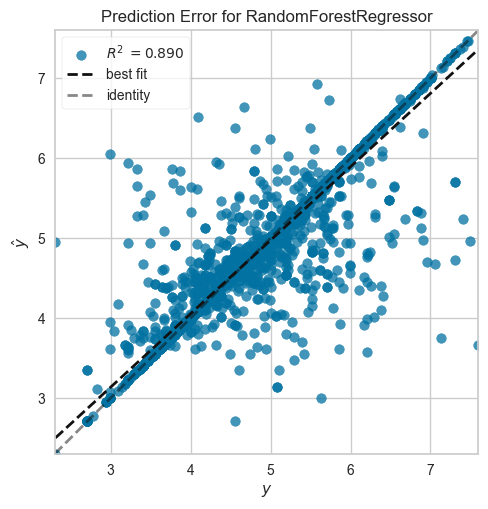

In [11]:
plot_model(rf, plot = 'error')

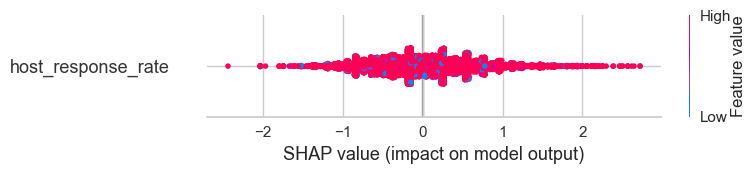

In [12]:
interpret_model(rf)

In [13]:
# finalize a model - use all the data in training
final_rf = finalize_model(rf)

In [14]:
# generate predictions on unseen data
df_test_data = pd.read_csv('test.csv', index_col='id')
df_test_data.dropna(inplace=True)
#predictions = predict_model(final_rf, data = df_test_data)
predictions = predict_model(final_rf, data = test)
predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.0340,0.0341,0.1848,0.9208,0.0322,0.0074


,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,...,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,price,prediction_label
id,,,,,,,,,,,,,,,,,,,,,
11402432,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",5,1.0,Real Bed,moderate,True,NYC,Entire 2 bedroom apartment located in Upper si...,...,Entire cozy apartment Upper Side,Hamilton Heights,27,91.0,https://a0.muscache.com/im/pictures/ae27dc46-c...,10031,2.0,2.0,5.010635,5.009862
8988340,House,Private room,"{""Air conditioning"",Kitchen,Heating,""Smoke det...",2,1.0,Real Bed,flexible,False,NYC,It is very roomy in a great and safe neighborh...,...,"1BR 2nd floor, house",South Beach,3,100.0,https://a0.muscache.com/im/pictures/a5500a6e-5...,10305,1.0,1.0,4.653960,4.668227
13031383,Apartment,Private room,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,flexible,False,DC,This newly appointed room is one of two master...,...,Luxury private room/balcony/bath near downtown DC,Langdon,3,100.0,https://a0.muscache.com/im/pictures/63efcbda-8...,20018,1.0,1.0,4.304065,4.304065
15985071,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.0,Real Bed,strict,True,NYC,Stay in a true industrial Brooklyn Loft in the...,...,Spacious Modern Industrial Loft,Williamsburg,13,98.0,https://a0.muscache.com/im/pictures/40612fb3-2...,11211,1.0,2.0,5.416101,5.415717
4016008,Apartment,Private room,"{""Wireless Internet"",Essentials,""translation m...",1,1.0,Real Bed,strict,True,NYC,I share my apartment with my roommates. I am o...,...,"Amazing Private Room,Great Location",Ditmars / Steinway,6,80.0,https://a0.muscache.com/im/pictures/f3ca3c62-1...,11105,1.0,1.0,3.891820,3.891820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6812162,Townhouse,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,moderate,True,DC,"Charming centrally located apartment, close t...",...,Central location! Comfortable and charming,Logan Circle,2,100.0,https://a0.muscache.com/im/pictures/eab695e9-9...,20009,1.0,1.0,5.857933,5.857933
15986856,Camper/RV,Entire home/apt,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,moderate,True,LA,Perfectly restored 1970's surf camper filled w...,...,Your Bro's Groovy 1978 Surf Camper,Los Feliz,59,95.0,https://a0.muscache.com/im/pictures/100687788/...,90027,1.0,2.0,4.356709,4.369951
20607717,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",4,1.0,Real Bed,strict,True,Boston,This 2 bedroom apartment is stylishly designed...,...,"Beautiful 2Bedroom in the South End, Garden Unit",South End,17,92.0,https://a0.muscache.com/im/pictures/a9e04bc5-8...,2116,2.0,2.0,5.857933,5.858081


In [15]:
# save a model
save_model(final_rf, 'rf_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\ahema\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=[], transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['host_response_rate'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('rest_encoding',
                  TransformerWrapper(include=['host_response_rate'],
                                     transformer=LeaveOneOutEncoder(cols=['host_response_rate'],
                                                                    handle_missing='return_nan',
                                                                    random_state=2824))),
                 ('actual_estimator',
                  RandomForestRegressor(n_jobs=-1, random_state=2824))]),
 'rf_model.pkl')